### 범주형,연속형 데이터 이진분류 실습
본 실습은 knn을 참조하였습니다

실습 데이터는 *Kaggle* [tabular-playground-series-mar-2021](https://www.kaggle.com/competitions/tabular-playground-series-mar-2021/data)을 참조 했습니다

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
import io
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
tr = pd.read_csv('train.csv')
tst = pd.read_csv('test.csv')

tr.head()


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [5]:
tst.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [6]:
tr.isna().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

In [7]:
tst.isna().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
dtype: int64

결측값은 없으므로 다음단계인 범주형 데이터의 One-Hot Coding을 진행한다.

cat1-cat18은 범주형데이터 cont1-10은 연속형데이터므로 cat column부분을 잘라내 One-Hot Coding을 해줄 것이다.

In [8]:
tst.shape

(200000, 31)

In [9]:
tr_id,tr_1,tr_2,tr_tar=np.hsplit(tr,(1,20,31))
tst_id,tst_1,tst_2,tst_tar=np.hsplit(tst,(1,20,31))

In [10]:
plus=pd.concat([tr_1,tst_1])

In [11]:
end=OneHotEncoder()
end.fit(plus)
tr_1_onehot=end.transform(tr_1).toarray()
tst_1_onehot=end.transform(tst_1).toarray()

In [12]:
tr_1_onehot.shape

(300000, 631)

In [13]:
col=[ 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18']

In [14]:
tr_1_index=tr_1.apply(lambda x: pd.factorize(x)[0])
tst_1_index=tst_1.apply(lambda x: pd.factorize(x)[0])
plus_index=plus.apply(lambda x: pd.factorize(x)[0])

In [15]:
countplus=np.max(plus_index)

In [16]:
countplus

cat0       1
cat1      14
cat2      18
cat3      12
cat4      19
cat5      83
cat6      15
cat7      50
cat8      60
cat9      18
cat10    306
cat11      1
cat12      1
cat13      1
cat14      1
cat15      3
cat16      3
cat17      3
cat18      3
dtype: int64

In [17]:
countplus.sum()#count_tst

612

In [18]:
count_=np.zeros(19)
for i in np.arange(19):
    count_[i]=countplus['cat'+str(i)]+1
count_

array([  2.,  15.,  19.,  13.,  20.,  84.,  16.,  51.,  61.,  19., 307.,
         2.,   2.,   2.,   2.,   4.,   4.,   4.,   4.])

In [19]:
count_=count_.astype(np.int64)

count_.dtype

dtype('int64')

In [20]:
tr_1_index = pd.DataFrame(tr_1_index)
tst_1_index = pd.DataFrame(tst_1_index)
ct=0
for c, count in zip(col, count_):
        
        for i in range(count):
            tr_1_index[c + "_" + str(i)] = tr_1_onehot[:, ct]
            tst_1_index[c + "_" + str(i)] = tst_1_onehot[:, ct]
            ct=ct+1
       
print(ct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


631


cat1-10 데이터에 대한 standardization후 각 행렬의 값을 합치도록하자.

In [21]:
normal_tr_2=(tr_2-tr_2.mean())/tr_2.std()
normal_tst_2=(tst_2-tst_2.mean())/tst_2.std()

In [22]:
tr_1_index=tr_1_index.drop(col,axis=1)
tst_1_index=tst_1_index.drop(col,axis=1)

In [23]:
tr_fix=pd.concat([tr_1_index,normal_tr_2],axis=1)
tst_fix=pd.concat([tst_1_index,normal_tst_2],axis=1)

In [24]:
tst_fix

,cat0_0,cat0_1,cat1_0,cat1_1,cat1_2,cat1_3,cat1_4,cat1_5,cat1_6,cat1_7,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.136508,0.288431,1.142676,-1.21803,-0.600532,0.302525,0.750805,0.614882,-0.56321,2.150364
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.847488,1.920632,0.19047,0.419886,1.218202,-1.127724,0.745512,-0.784748,0.490809,-0.590383
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.215138,-0.426299,-0.60187,-1.156251,-0.955147,1.227552,-0.819919,-0.822232,-1.115513,-0.477537
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.809289,0.384246,0.399619,1.327364,0.972774,0.24326,-0.594316,-0.037294,-0.622048,-0.898618
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.308297,-0.171606,1.348242,-1.110559,-0.606403,-1.45927,1.279702,0.414543,-0.018214,0.376637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.623118,-0.765903,-0.68051,-1.317018,0.737502,-0.006378,-0.900687,0.180833,0.255038,-0.401397
199996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.268676,0.523477,0.933432,0.528891,0.22424,-1.158782,0.972286,0.24258,0.300589,2.028534
199997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.49709,1.336064,-0.693918,0.707978,-0.052752,1.731363,0.372719,1.808935,0.345098,0.111724
199998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.491906,1.416563,0.397212,1.288132,0.223342,1.226567,-0.651142,-0.277366,1.260066,-0.622757


데이터 전처리가 끝났으므로 나머지 변수들은 제거해주도록하자.

In [25]:
del tr, tr_1, tr_1_index, tr_1_onehot, tr_2, tst, tst_1, tst_1_index, tst_1_onehot,tst_2,normal_tr_2, normal_tst_2,


In [26]:
import torch.nn as nn
import torch.optim as optim # 최적화 툴 패키지

from tqdm import tqdm

import torch
from torch.utils.data import DataLoader, TensorDataset

In [27]:
tr_fix.dtypes

cat0_0    float64
cat0_1    float64
cat1_0    float64
cat1_1    float64
cat1_2    float64
           ...   
cont6      object
cont7      object
cont8      object
cont9      object
cont10     object
Length: 642, dtype: object

In [28]:
tr_fix=tr_fix.astype('float64')
tst_fix=tst_fix.astype('float64')
tr_tar=tr_tar.astype('float64')
tst_tar=tst_fix.astype('float64')

In [29]:
tr_fix, tr_fix_t,tr_tar , tr_tar_t = train_test_split(tr_fix, tr_tar, test_size=0.3)

tr_fix.shape,tr_fix_t.shape,tr_fix.shape,tr_fix_t.shape

((210000, 642), (90000, 642), (210000, 642), (90000, 642))

본데이터에서는 target값이 0과1밖에없으므로 이진분류로 취급된다.
torch에 있는 모듈을 활용해보자.

최적화를 위한 SGD(확률적 경사하강법), 과적합을 방지하기위한 Dropout을 사용할 것이다.

In [30]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, target_size, lr=1e-4):
        super(BinaryClassifier,self).__init__()
        torch.set_default_dtype(torch.float64)
 
        self.layers = nn.Sequential(
            nn.BatchNorm1d(input_size),
            nn.Linear(input_size, hidden_size),
            nn.Dropout(0.2),
            nn.Linear(hidden_size, target_size),
            nn.Softmax()    
        )
        self.loss=nn.CrossEntropyLoss()
        self.optim=optim.SGD(self.parameters(), lr=lr, momentum=0.9)
 
      
    def forward(self, X):
        return self.layers(X)
    
    def backward(self, X, y):
        self.optim.zero_grad()
        
        out = self.forward(X)
        loss = self.loss(out, y.long())
        loss.backward()
        self.optim.step()
        
        return loss, out
    def get_batch(self, X, y, i, batch_size):
        n = i * batch_size
        m = min(X.shape[0], n + batch_size)

        return X.iloc[n:m, :], y.iloc[n:m]

데이터의 크기가 크므로 한번에 돌릴순 없으므로 batch 사이즈를 1000, iteration을 10으로 놓고 학습시켜 보겠다.

In [31]:
net = BinaryClassifier(tr_fix.shape[1], 26, 2)
batch_size = 1000
batch_num = tr_fix.shape[0] // batch_size
loss = []
score = []
loss_h = []
p=[]
for itr in range(10):
    for b in tqdm(range(batch_num)):
        X_b, y_b = net.get_batch(tr_fix, tr_tar, b, batch_size)
        #print(X_b, X_b.dtypes)
        #print(y_b, y_b.dtypes)
        X_b=torch.tensor(X_b.values)
        y_b=torch.tensor(y_b.values)
        y_b=y_b.squeeze()
        #print(X_b)
       #print(y_b)
       
        loss, p = net.backward(X_b, y_b)
        loss_h.append(loss.item())
        del X_b, y_b

  0%|          | 0/210 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 210/210 [00:02<00:00, 96.66it/s]


잘 나왔는지 loss 함수가 어떻게 변화하는지 그래프로 출력해보자.
또한, 예측 확률값도 알아보자

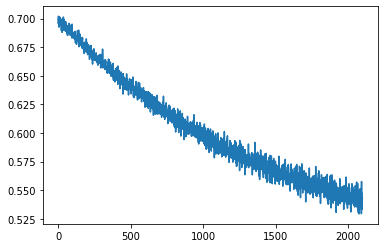

In [32]:
import matplotlib.pyplot as plt

plt.plot(loss_h)

plt.show()

In [33]:
p

tensor([[0.7261, 0.2739],
        [0.5425, 0.4575],
        [0.1876, 0.8124],
        ...,
        [0.5444, 0.4556],
        [0.0682, 0.9318],
        [0.7163, 0.2837]], grad_fn=<SoftmaxBackward0>)

In [34]:

tr_fix_t=torch.tensor(tr_fix_t.values)
tr_tar_t=torch.tensor(tr_tar_t.values)
tr_tar_t=tr_tar_t.squeeze()
y_prob = net(tr_fix_t)
y_hat = y_prob.argmax(1)
acc = (tr_tar_t==y_hat).sum() / y_hat.shape[0]

acc.item()

0.8097888888888889

대략 80.9프로의 정확도를 보여준다. 이제 csv파일로 저장하여 kaggle에 제출하자

In [35]:
y_hat

tensor([0, 0, 0,  ..., 0, 1, 0])

In [36]:

ans = pd.DataFrame()
tst_fix=torch.tensor(tst_fix.values)

y_prob = net(tst_fix)
y_prob = y_prob.detach().numpy()
y_hat = y_prob.argmax(1)
print(y_hat)
ans["id"] = tst_id["id"]
ans["target"] = y_hat
ans=ans.set_index("id")


[0 1 0 ... 1 0 0]


In [37]:
ans.to_csv("a.csv")
files.download("a.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>